In [1]:
import pandas as pd
import numpy as np
import os

import librosa
import librosa.display
import IPython.display as ipd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler,minmax_scale
normalizer = StandardScaler()

In [2]:
# #PATH
# path_info = "C:/Users/USER/Downloads/Tugas Akhir/dataset/annotations/"
# path_to_file = "C:/Users/USER/Downloads/Tugas Akhir/dataset/clips_45sec_wav/"

path_info = "F:/178/Tugas Akhir/dataset/annotations/"
path_to_file = "F:/178/Tugas Akhir/dataset/clips_45sec_wav/"
path_to_file_full = "F:/178/Tugas Akhir/dataset/clips_full/"

In [19]:
def norm(data):
    normalizer.fit(data)
    normalized = normalizer.transform(data)
    
    return normalized

In [3]:
# LOAD

# 1. Get the file path to the included audio example
path = path_to_file+"2.wav"
# path = "C:/Users/USER/Downloads/Tugas Akhir/dataset/tes/wav/Adele - Someone Like You.wav"

# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(path,sr=22050) #load 45 and with same freq

D = np.abs(librosa.stft(y))
times = librosa.frames_to_time(np.arange(D.shape[1]))

In [4]:
#Play

ipd.Audio(data=y, rate=sr) # load a NumPy array

In [3]:
data = pd.read_csv(path_info+'static_annotations.csv')

data.head()

,song_id,mean_arousal,std_arousal,mean_valence,std_valence
0,2,3.1,0.99443,3.0,0.66667
1,3,3.5,1.84090,3.3,1.70290
2,4,5.7,1.49440,5.5,1.71590
3,5,4.4,2.11870,5.3,1.94650
4,7,5.8,1.54920,6.4,1.77640


In [16]:
arousal = data.mean_arousal.values.reshape(-1, 1)
valence = data.mean_valence.values.reshape(-1, 1)

In [20]:
normalized_ar = norm(arousal)
normalized_val = norm(valence)

In [26]:
scaled_ar = minmax_scale(normalized_ar,feature_range=(-1, 1))
scaled_val = minmax_scale(normalized_val,feature_range=(-1, 1))

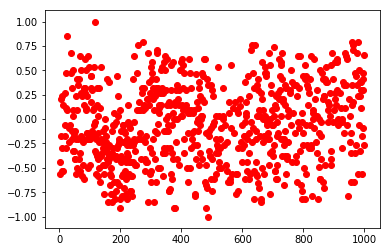

In [91]:
# Arousal Plot
plt.figsize=(18, 6)
plt.scatter(x=data.song_id,y=scaled_ar,color='red')
plt.show()

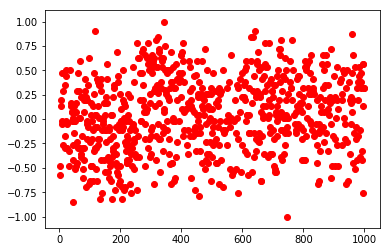

In [92]:
# Valence Plot
plt.figsize=(18, 6)
plt.scatter(x=data.song_id,y=scaled_val,color='red')
plt.show()

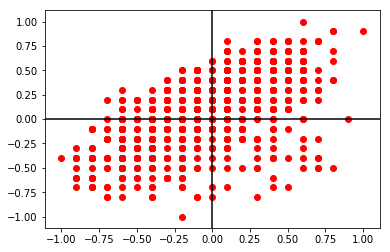

In [13]:
# Arousal Valence Plot

plt.figsize=(18, 6)
plt.scatter(x=scaled_ar,y=scaled_val,color='red')
X = plt.axhline(y=0,color='black', label ="X")
Y = plt.axvline(x=0,color='black', label ="Y")
plt.show()